In [2]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table           import Table, vstack

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [4]:
from   gama_limits import gama_field
from   delta8_limits import delta8_tier
import pubplot

In [5]:
field = 'G9'

In [6]:
gama_d8 = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
32174,587722981741691177,183.70037809,-1.05288215,19.736502,0.08332,4,G12_Y2_043_160,5,21.557545,20.126371,19.787603,19.484722,19.264608,266.27475872158834,37.12664999915889,G12,-245.24125652386456,-15.860665751468476,-4.516540592019583,0.338768,0.35475794585729775,0,3,-0.10646642580750192,-0.1224563662936968,0.06937209369424623,0.060984572243037216,0.3471555268223028,2.12,-0.080820404,-0.1766384,-17.378699995134422,-17.28288200453336,37.11520168886001,37.01938369825895,0.06349754,0.08582235568257114,0.0,-7.7365017,0.002394387322182377,0.0,0 .. 0,0.38286669806541435,179119,8.103221833476626,1.0379264745778098,22,30,75,0.6356962089955482,0.30107595736367454,0.7632803324051429
144355,587724650867524042,179.66102327,-1.40728884,19.757875,0.25293,4,G12_Y2_044_206,5,21.755758,20.432243,19.696829,19.460794,19.193336,902.3148855942798,39.77679061016829,G12,-719.9340667453704,4.25936683630219,-17.686760009292964,0.7354145,0.44013276051430233,0,3,-0.09365587645106356,0.201625868039517,0.09549166349861014,0.41068063584072967,0.4202255326627633,2.12,-0.24534209,-0.53621155,-19.86906474043612,-19.57819528092627,39.626940182941006,39.336070723431156,0.042123795,0.25840545857317754,0.0,-7.7578754,0.006874951846856747,0.0,0 .. 0,0.7365020913184445,490933,19.139754762979756,1.0006245347906468,25,0,0,0.9280372369440453,-1.0,-1.0
124541,587724649256976626,179.89751219,-2.57730755,18.748053,0.15081,4,G12_Y5_027_201,6,21.232367,19.656624,18.665045,18.255375,17.882515,505.0130530866764,38.51651301742749,G12,-438.3880940653836,0.784167420215807,-19.73313642858396,0.99157906,0.8658975198450761,0,6,-0.04232290285814033,0.08335863308291636,0.18535825331634592,0.4453724584118625,0.7315648506906163,0.8,-0.14628571,-0.120648004,-19.807532960978975,-19.83317066958331,38.55558555802487,38.58122326662921,1.0519466,0.2295906335782965,0.0,-6.7480526,0.007698888379481501,0.0,0 .. 0,0.8995485862245776,783410,2.6506381441815234,0.7367133107964687,11,18,0,0.15223410165319318,0.09982091687020489,-1.0
118797,587724648722006137,184.17555062,-2.99648752,18.028751,0.11158,4,G12_Y6_043_164,6,20.562859,18.805058,17.933498,17.555489,17.241117,363.8204262003115,37.804435391408795,G12,-325.9851692787255,-23.79900353827768,-17.10953455603715,0.87155914,0.846260624586955,0,5,-0.08973139552262453,-0.06443287704317324,0.138306210819992,0.2904407874267772,0.719424566459621,0.8,-0.1082326,-0.089264,-19.805757626460696,-19.82472623096576,37.83450899975171,37.853477604256774,1.7712479,0.22928748445538527,0.0,-6.0287514,0.007668184907096908,0.0,0 .. 0,1.0036556381140813,946680,3.6125548752889935,0.5175644145468863,37,61,0,4.516757213975895,4.305342340738256,-1.0
39636,587722982275940549,177.66111022,-0.65931048,19.175905,0.14049,4,G12_Y2_019_297,6,22.140453,20.212257,19.111605,18.726572,18.40837,467.2312176782153,38.34765926055226,G12,-409.30744566436306,16.7177603718603,-4.714092626245793,1.1006527,0.9885261358871473,0,6,-0.0468827155592

In [7]:
gama_d8['ZGAMA'].min(), gama_d8['ZGAMA'].max()

(0.03903, 0.26299)

In [8]:
np.unique(gama_d8['FIELD'].data)

array([b'G12', b'G15', b'G9'], dtype='|S4')

In [9]:
gama_d8 = gama_d8[gama_d8['FIELD'] == field]

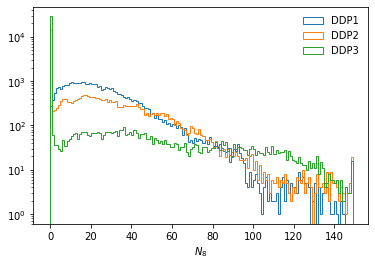

In [10]:
bins=np.arange(-1., 150., 1.)

_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

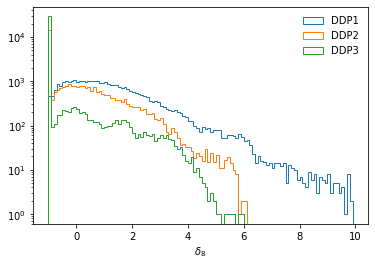

In [11]:
bins=np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

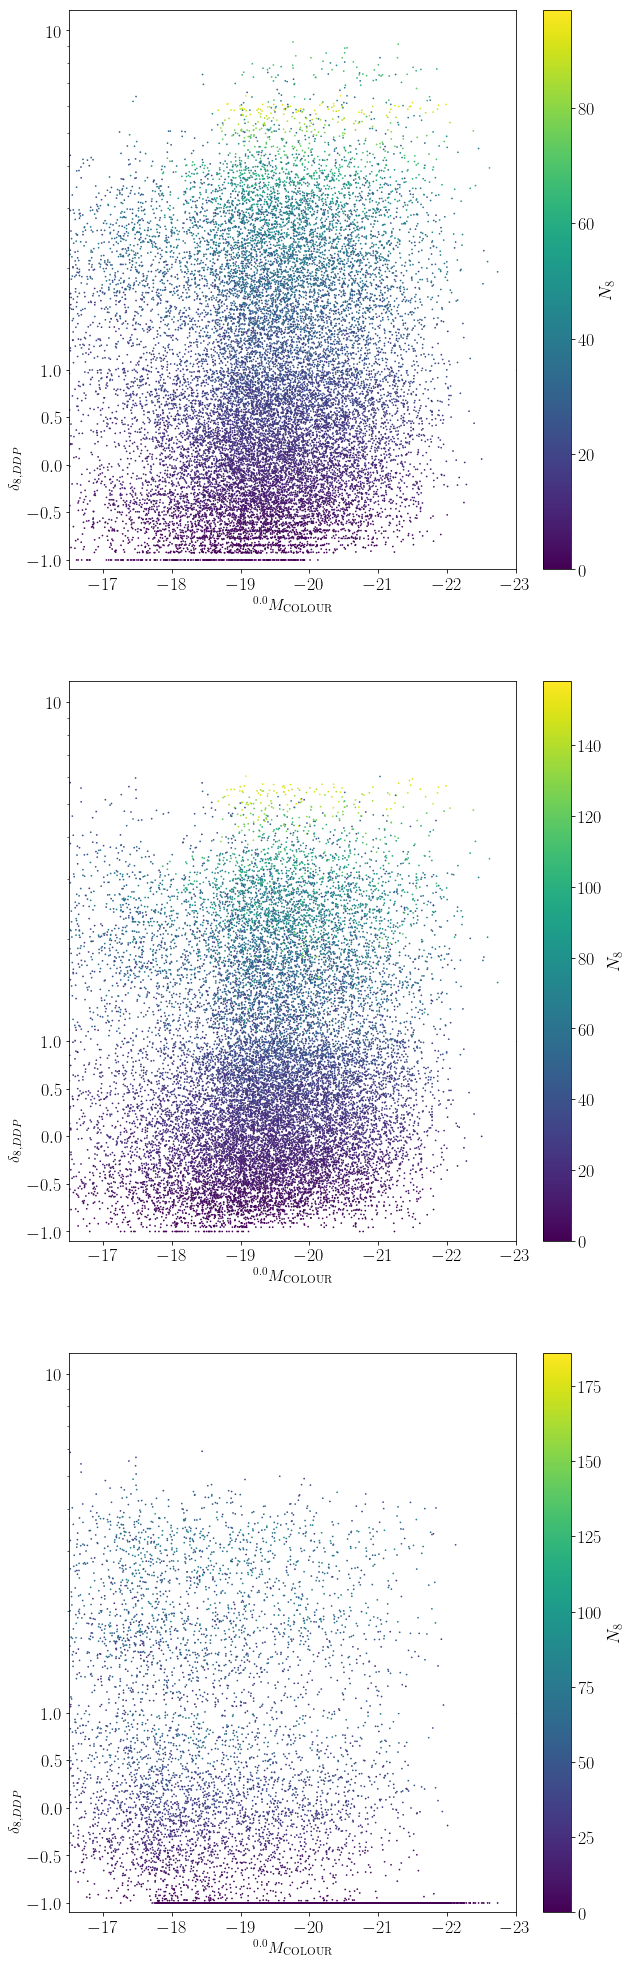

In [177]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    ddp_num = idx + 1
    sc = ax.scatter(gama_d8['MCOLOR_0P0'],\
                    gama_d8['DDP{}_DELTA8'.format(ddp_num)],\
                    c=gama_d8['DDP{}_N8'.format(ddp_num)],\
                    marker='.',\
                    lw=0.0,\
                    s=12)

    ax.set_xlabel(r'$^{0.0}M_{\rm COLOUR}$', fontsize=16)
    ax.set_ylabel(r'$\delta_{8,DDP}$', fontsize=16)

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-16.5, -23.))
    axLog.set_ylim((1., 11.5))
    axLog.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP{}_DELTA8'.format(ddp_num)], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

In [30]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-moor2/data/GAMA4/randoms/randoms_bd_ddp_n8_G9_0.fits', '/cosma/home/durham/dc-moor2/data/GAMA4/randoms/randoms_bd_ddp_n8_G12_0.fits', '/cosma/home/durham/dc-moor2/data/GAMA4/randoms/randoms_bd_ddp_n8_G15_0.fits']


/cosma/home/durham/dc-moor2/.local/lib/python3.9/site-packages/astropy/table/table.py:3488: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


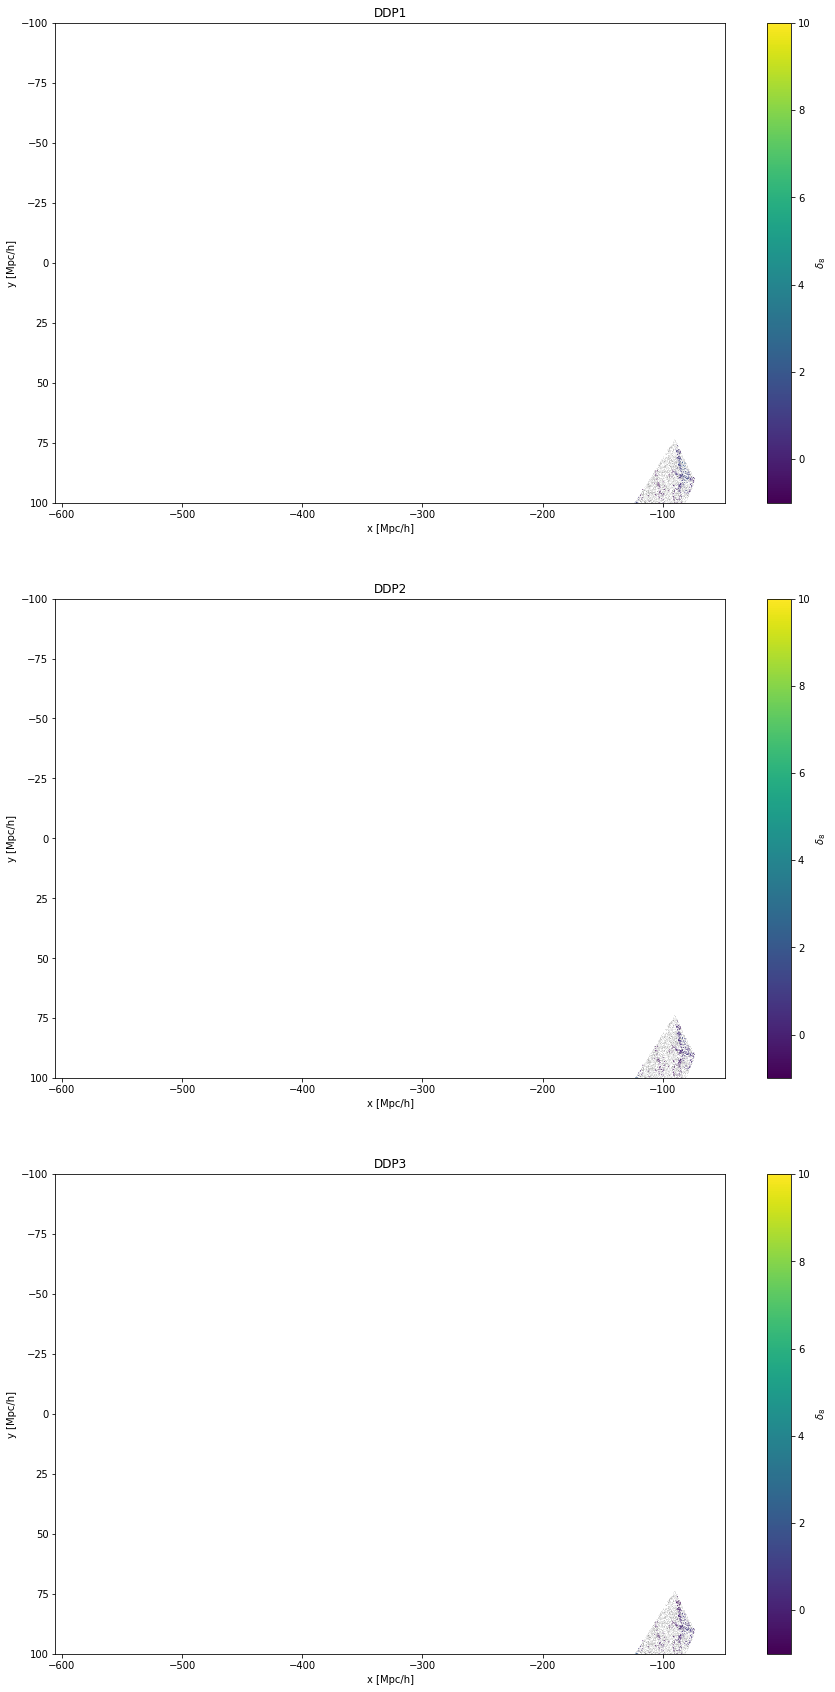

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

rand_d8   = rand[rand['FIELD'] == field]

gama_d8_slice = gama_d8[np.abs(gama_d8['CARTESIAN_Z']) < 5.]
rand_d8_slice = rand_d8[np.abs(rand_d8['CARTESIAN_Z']) < 5.]

for idx in range(3):
    # rand_d8_slice['DDP{}_DELTA8'.format(idx+1)]
    
    sc = axes[idx].scatter(rand_d8_slice['CARTESIAN_X'],\
                           rand_d8_slice['CARTESIAN_Y'],\
                           c='k',\
                           alpha=0.05,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    sc = axes[idx].scatter(gama_d8_slice['CARTESIAN_X'],\
                           gama_d8_slice['CARTESIAN_Y'],\
                           c=gama_d8_slice['DDP{}_DELTA8'.format(idx+1)],\
                           alpha=1.,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    
    axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlabel('x [Mpc/h]')
    axes[idx].set_ylabel('y [Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

In [15]:
rand['Z'].min(), rand['Z'].max()

(0.03900268, 0.26299992)

In [16]:
gama_d8.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

In [17]:
np.unique(rand['FIELD'], return_counts=True)

(<Column name='FIELD' dtype='bytes4' length=3>
 G12
 G15
  G9,
 array([1265955, 1265955, 1265955]))

In [18]:
tiers = delta8_tier(gama_d8['DDP1_DELTA8'])

In [19]:
np.unique(tiers, return_counts=True)

(array([-99,   0,   1,   2,   3]), array([19096,  1302,  4021,  7860,  2081]))

In [20]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-moor2/data/GAMA4/randoms/randoms_G9_0.fits', '/cosma/home/durham/dc-moor2/data/GAMA4/randoms/randoms_G12_0.fits', '/cosma/home/durham/dc-moor2/data/GAMA4/randoms/randoms_G15_0.fits']


G9
-580.43097 -73.76151
73.60615 -73.76151
-26.05787 -73.76151

G12
-747.16486 -115.565475
-78.02824 -115.565475
-39.08608 -115.565475

G15
-636.78845 -84.78161
-514.0881 -84.78161
-26.05787 -84.78161



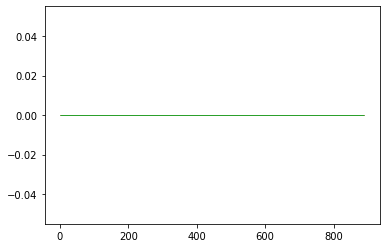

In [21]:
for field in ['G9', 'G12', 'G15']:
    in_field = rand[rand['FIELD'] == field]
    
    # pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0)
    
    pl.hist(in_field['CARTESIAN_X'], histtype='step', bins=np.arange(0., 900., 10.))
        
    print(field)
    print(np.sort(in_field['CARTESIAN_X'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print(np.sort(in_field['CARTESIAN_Y'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print(np.sort(in_field['CARTESIAN_Z'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print()

In [22]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'IS_BOUNDARY')

In [34]:
gama_d8.meta['DDP1_ZMIN']

0.0390699990093708

Text(0, 0.5, '$\\delta_{8, DDP2}$')

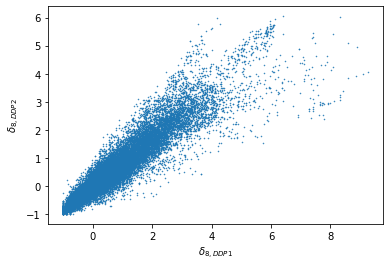

In [44]:
DDP1_ZMIN = gama_d8.meta['DDP1_ZMIN']
DDP2_ZMAX = gama_d8.meta['DDP2_ZMAX']

gama_d8 = gama_d8[gama_d8['ZGAMA'] > DDP1_ZMIN]
gama_d8 = gama_d8[gama_d8['ZGAMA'] < DDP2_ZMAX]


plt.scatter(gama_d8['DDP1_DELTA8'], gama_d8['DDP2_DELTA8'], s=0.25)



plt.xlabel(r'$\delta_{8, DDP1}$')
plt.ylabel(r'$\delta_{8, DDP2}$')

/tmp/ipykernel_96429/3966075976.py:25: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axLog.set_ylim((-1., 50.))


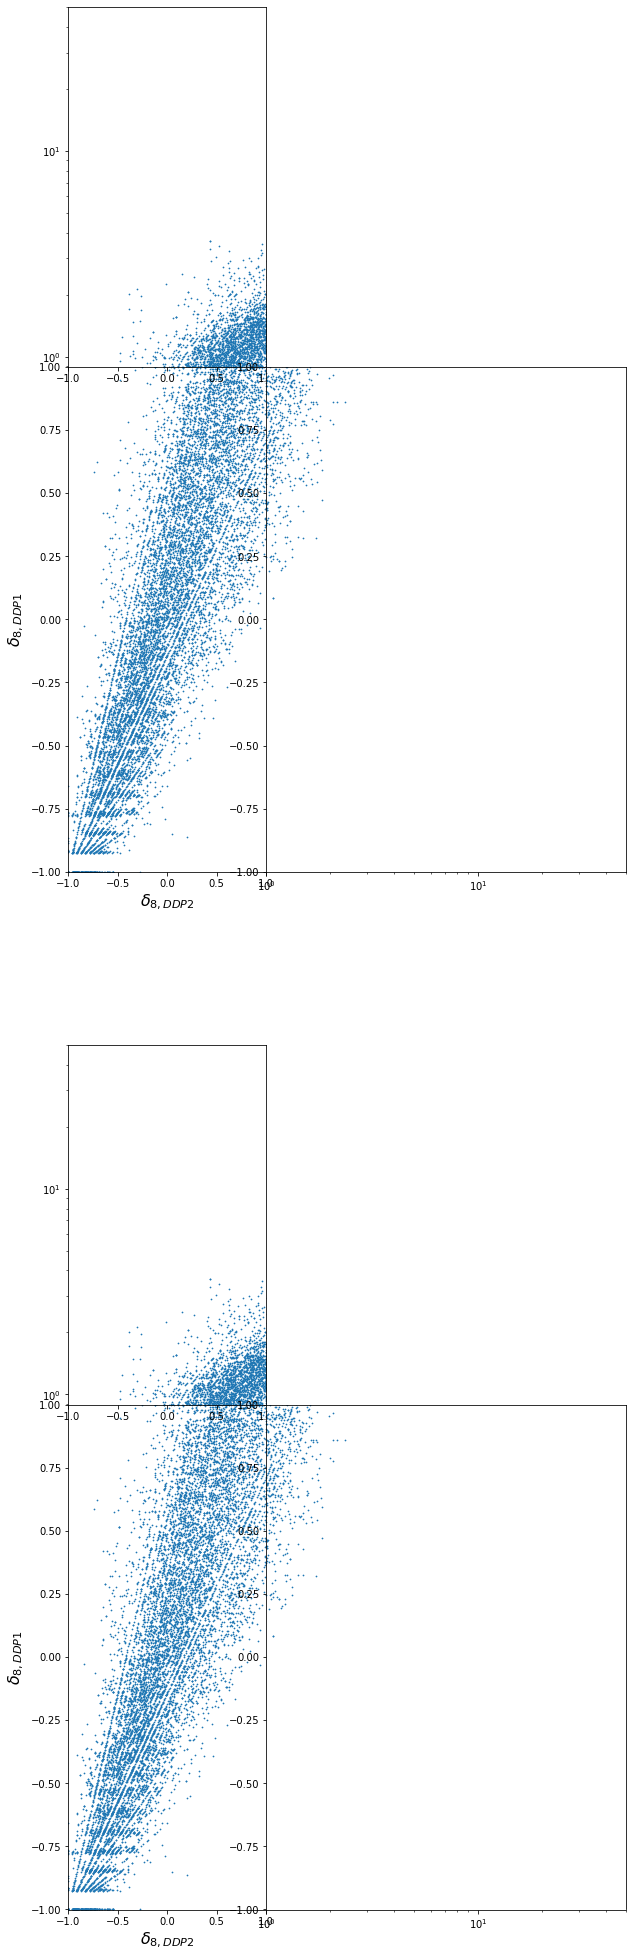

In [87]:
fig, axes = plt.subplots(2, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    
    # generate bottom-left
    sc = ax.scatter(gama_d8['DDP2_DELTA8'],\
                    gama_d8['DDP1_DELTA8'],\
                    marker='.',\
                    lw=0.0,\
                    s=12)

    ax.set_xlabel(r'$\delta_{8,DDP2}$', fontsize=16)
    ax.set_ylabel(r'$\delta_{8,DDP1}$', fontsize=16)

    ax.set_xlim(-1.1, 1.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-1, 1.))
    axLog.set_ylim((-1., 50.))
    axLog.scatter(gama_d8['DDP2_DELTA8'], gama_d8['DDP1_DELTA8'], marker='.', lw=0.0, s=12)
    
    #axLog.spines['bottom'].set_visible(False)
    #axLog.xaxis.set_ticks_position('top')
    #axLog.xaxis.set_visible(False)

    #axLog.set_yticks([10.])
    #axLog.set_yticklabels(['10'])
    
    axLog2 = divider.append_axes("right", size=5.0, pad=0, sharey=ax)
    axLog2.set_xscale('log')
    axLog2.set_xlim((1., 50.))
    axLog2.set_ylim((-1., 1.))
    axLog2.scatter(gama_d8['DDP2_DELTA8'], gama_d8['DDP1_DELTA8'], marker='.', lw=0.0, s=12)


    #divider3 = make_axes_locatable(axLog)
    #axLog3 = divider3.append_axes("right", size=5.0, pad=0, sharey=axLog)
    #axLog3.set_xscale('log')
    #axLog3.set_yscale('log')
    #axLog3.set_xlim((1., 50.))
    #axLog3.set_ylim((1., 50.))
    #axLog3.scatter(gama_d8['DDP2_DELTA8'], gama_d8['DDP1_DELTA8'], marker='.', lw=0.0, s=12)
    
    ax.set_title('DDP')


In [146]:
import matplotlib.ticker as mticker

Text(0, 0.5, '$\\delta_{8, DDP1}$')

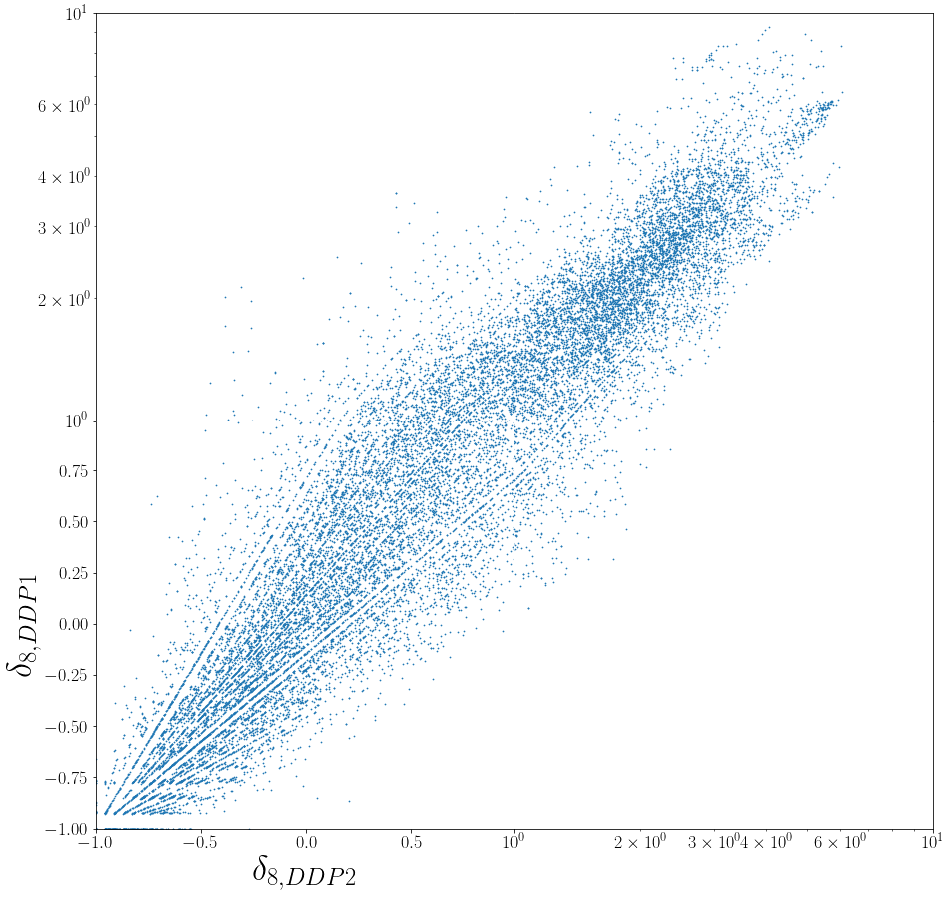

In [174]:
fig, axes = plt.subplots(2,2, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(2):
    for j in range(2):
        sc = axes[i,j].scatter(gama_d8['DDP2_DELTA8'],\
                        gama_d8['DDP1_DELTA8'],\
                        marker='.',\
                        lw=0.0,\
                        s=12)

axes[0,0].set_xlim(-1., 1.)
axes[1,0].set_xlim(-1., 0.99)
axes[0,1].set_xlim(1., 10.)
axes[1,1].set_xlim(1., 10.)
axes[0,1].set_xscale('log')
axes[1,1].set_xscale('log')

axes[1,1].set_ylim(-1., 1.)
axes[0,1].set_ylim(1., 10)
axes[1,0].set_ylim(-1., 0.99)
axes[0,0].set_ylim(1., 10.)

axes[0,1].set_yscale('log')
axes[0,0].set_yscale('log')

axes[0,0].spines['right'].set_visible(False) 
axes[1,0].spines['right'].set_visible(False) 
axes[0,1].spines['left'].set_visible(False) 
axes[1,1].spines['left'].set_visible(False) 
axes[1,1].spines['top'].set_visible(False) 
axes[1,0].spines['top'].set_visible(False) 
axes[0,0].spines['bottom'].set_visible(False) 
axes[0,1].spines['bottom'].set_visible(False) 

axes[0,0].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_yaxis().set_visible(False)
axes[1,1].axes.get_yaxis().set_visible(False)

axes[1,0].set_xlabel(r'$\delta_{8, DDP2}$', fontsize=35)
axes[1,0].set_ylabel(r'$\delta_{8, DDP1}$', fontsize=35)

#axes[0,0].yaxis.set_minor_formatter(mticker.ScalarFormatter())

#axes[1,1].get_xaxis().get_major_formatter().labelOnlyBase = False

#axes[1,1].set_xticks([1, 10])
#axes[1,1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


# Done.